<h1>Answering Business Questions using SQL</h1>

<h3>Creating helper function:</h3>

In [1]:
import sqlite3
import pandas as pd

In [2]:
def run_query(q):
    with sqlite3.connect('chinook.db') as conn:
        return pd.read_sql(q, conn)

In [3]:
def run_command(SQLcommand):
    with sqlite3.connect('chinook.db') as conn:
        conn.isolation_level = None
        conn.execute(SQLcommand)

In [4]:
def show_tables():
    q = '''
        SELECT
            name,
            type
        FROM sqlite_master
        WHERE type IN ("table","view"); 
        '''
    return run_query(q)   

In [5]:
show_tables()

,name,type
0,album,table
1,artist,table
2,customer,table
3,employee,table
4,genre,table
5,invoice,table
6,invoice_line,table
7,media_type,table
8,playlist,table
9,playlist_track,table


<p>These helper function will help to ease our basic operations like connecting to database, runing querry, inspecting tables and various views that we created.</p>

<h3>Selecting Albums to purchase</h3>

In [6]:
q = '''
select 
        t.track_id tracks_info,
        t.genre_id,
        c.country
    FROM track t
    INNER JOIN
    invoice_line il
    ON t.track_id=il.track_id
    INNER JOIN
    invoice i
    ON i.invoice_id=il.invoice_id
    INNER JOIN
    customer c
    ON i.customer_id=c.customer_id
    WHERE c.country="USA";
'''
run_query(q)

,tracks_info,genre_id,country
0,1158,1,USA
1,1159,1,USA
2,1160,1,USA
3,1161,1,USA
4,1162,1,USA
5,1163,1,USA
6,1164,1,USA
7,1165,1,USA
8,1166,1,USA
9,1167,1,USA


In [7]:
genre_sales_usa = '''
WITH usa_track_purchase AS
(select 
        t.track_id tracks_info,
        t.genre_id,
        c.country
    FROM track t
    INNER JOIN
    invoice_line il
    ON t.track_id=il.track_id
    INNER JOIN
    invoice i
    ON i.invoice_id=il.invoice_id
    INNER JOIN
    customer c
    ON i.customer_id=c.customer_id
    WHERE c.country="USA")


SELECT
    g.name genre_name,
    COUNT(tracks_info) tracks_sold,
    cast(count(tracks_info) AS FLOAT)/(SELECT COUNT(*) FROM usa_track_purchase) tracks_sold_percentage
FROM
genre g
INNER JOIN
usa_track_purchase ct
ON ct.genre_id=g.genre_id
GROUP BY genre_name
ORDER BY tracks_sold DESC;
    
'''
run_query(genre_sales_usa)

,genre_name,tracks_sold,tracks_sold_percentage
0,Rock,561,0.533777
1,Alternative & Punk,130,0.123692
2,Metal,124,0.117983
3,R&B/Soul,53,0.050428
4,Blues,36,0.034253
5,Alternative,35,0.033302
6,Latin,22,0.020932
7,Pop,22,0.020932
8,Hip Hop/Rap,20,0.019029
9,Jazz,14,0.013321


<p>By looking at the above result we can conclude that top three most albums sold in USA are Rock with 53%, Alternative and Punk with 12%, Metal with 11% approx.<br>These albums have high chances of giving benifit to the store as people prefer to purchase these albums.</p>

<h3>Analyzing employee sales performance:</h3>

In [8]:
q='''
    SELECT
        e.employee_id,
        e.first_name||" "||e.last_name employee_name,
        e.title,
        c.customer_id
    FROM employee e
    INNER JOIN customer c
    ON e.employee_id=c.support_rep_id
'''
run_query(q)

,employee_id,employee_name,title,customer_id
0,3,Jane Peacock,Sales Support Agent,1
1,3,Jane Peacock,Sales Support Agent,3
2,3,Jane Peacock,Sales Support Agent,12
3,3,Jane Peacock,Sales Support Agent,15
4,3,Jane Peacock,Sales Support Agent,18
5,3,Jane Peacock,Sales Support Agent,19
6,3,Jane Peacock,Sales Support Agent,24
7,3,Jane Peacock,Sales Support Agent,29
8,3,Jane Peacock,Sales Support Agent,30
9,3,Jane Peacock,Sales Support Agent,33


In [9]:
employee_performance = '''
    WITH emp_cust_detail AS
    (
    SELECT
        e.employee_id,
        e.hire_date,
        e.first_name||" "||e.last_name employee_name,
        e.title,
        c.customer_id
    FROM employee e
    INNER JOIN customer c
    ON e.employee_id=c.support_rep_id
    )
    
    SELECT
        ecd.employee_id,
        ecd.employee_name,
        ecd.hire_date,
        SUM(i.total) total_sales
    FROM emp_cust_detail ecd
    INNER JOIN
    invoice i
    ON i.customer_id=ecd.customer_id
    GROUP BY employee_name
    ORDER BY 3 DESC;
    
    
'''
run_query(employee_performance)

,employee_id,employee_name,hire_date,total_sales
0,5,Steve Johnson,2017-10-17 00:00:00,1393.92
1,4,Margaret Park,2017-05-03 00:00:00,1584.00
2,3,Jane Peacock,2017-04-01 00:00:00,1731.51


<p>By looking at the result we can say that Steve Johnson has the record of selling highest amount in very short span of time. He joined at last but his sales is highest among all the three sales representatives.</p>

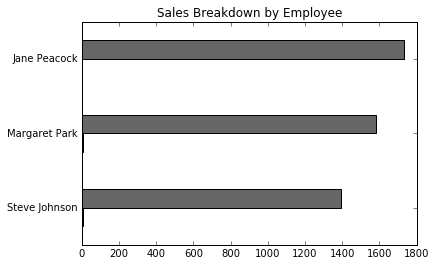

In [10]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib inline

employee_sales = run_query(employee_performance)

employee_sales.set_index("employee_name", drop=True, inplace=True)
employee_sales.sort_values("total_sales", inplace=True)
employee_sales.plot.barh(
    legend=False,
    title='Sales Breakdown by Employee',
    colormap=plt.cm.Accent
)
plt.ylabel('')
plt.show()

<h3>Analyzing sales by country:</h3>

In [11]:
q = '''
    CREATE VIEW country_customer AS
    SELECT
        c.country,
        count(c.customer_id) customer_count
    FROM customer c
    GROUP by country
    ORDER by customer_count DESC;    
'''
q1 = 'drop view country_customer'
run_command(q1)

OperationalError: no such view: country_customer

In [ ]:
q = '''
    WITH country_case AS
    (
    SELECT
        country,
        customer_count
    FROM
        (
        SELECT
            cc.*,
            CASE
                WHEN cc.customer_count = 1 THEN "Other"
                ELSE 0
            END AS sort
        FROM country_customer cc
        )
    ORDER BY sort ASC
    )
    
    SELECT
    count(c.customer_id) total_customer,
    SUM(i.total) total_sales,
    
'''
run_query(q)

In [ ]:
q = '''
    SELECT
            cc.*,
            CASE
                WHEN cc.customer_count = 1 THEN "Other"
                ELSE 0
            END
        FROM country_customer cc
'''
run_query(q)

In [ ]:
q1='''
    SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
     GROUP BY country
     ORDER BY c.customer_id DESC
'''
run_query(q1)

In [ ]:
sales_by_country = '''
WITH country_or_other AS
    (
     SELECT
       CASE
           WHEN (
                 SELECT count(*)
                 FROM customer
                 where country = c.country
                ) = 1 THEN "Other"
           ELSE c.country
       END AS country,
       c.customer_id,
       il.*
     FROM invoice_line il
     INNER JOIN invoice i ON i.invoice_id = il.invoice_id
     INNER JOIN customer c ON c.customer_id = i.customer_id
    )

SELECT
    country,
    customers,
    total_sales,
    average_order,
    customer_lifetime_value
FROM
    (
    SELECT
        country,
        count(distinct customer_id) customers,
        SUM(unit_price) total_sales,
        SUM(unit_price) / count(distinct customer_id) customer_lifetime_value,
        SUM(unit_price) / count(distinct invoice_id) average_order,
        CASE
            WHEN country = "Other" THEN 1
            ELSE 0
        END AS sort
    FROM country_or_other
    GROUP BY country
    ORDER BY sort ASC, total_sales DESC
    );
'''

run_query(sales_by_country)

In [ ]:
import numpy as np
country_metrics = run_query(sales_by_country)
country_metrics.set_index("country", drop=True, inplace=True)
colors = [plt.cm.Accent(i) for i in np.linspace(0, 1, country_metrics.shape[0])]

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(9, 10))
ax1, ax2, ax3, ax4 = axes.flatten()
fig.subplots_adjust(hspace=.5, wspace=.3)


# top left
sales_breakdown = country_metrics["total_sales"].copy().rename('')
sales_breakdown.plot.pie(
    ax=ax1,
    startangle=-90,
    counterclock=False,
    title='Sales Breakdown by Country,\nNumber of Customers',
    colormap=plt.cm.Accent,
    fontsize=8,
    wedgeprops={'linewidth':0}
    
)

# top right
cvd_cols = ["customers","total_sales"]
custs_vs_dollars = country_metrics[cvd_cols].copy()
custs_vs_dollars.index.name = ''
for c in cvd_cols:
    custs_vs_dollars[c] /= custs_vs_dollars[c].sum() / 100
custs_vs_dollars.plot.bar(
    ax=ax2,
    colormap=plt.cm.Set1,
    title="Pct Customers vs Sales"
)
ax2.tick_params(top="off", right="off", left="off", bottom="off")
ax2.spines["top"].set_visible(False)
ax2.spines["right"].set_visible(False)


# bottom left
avg_order = country_metrics["average_order"].copy()
avg_order.index.name = ''
difference_from_avg = avg_order * 100 / avg_order.mean() - 100
difference_from_avg.drop("Other", inplace=True)
difference_from_avg.plot.bar(
    ax=ax3,
    color=colors,
    title="Average Order,\nPct Difference from Mean"
)
ax3.tick_params(top="off", right="off", left="off", bottom="off")
ax3.axhline(0, color='k')
ax3.spines["top"].set_visible(False)
ax3.spines["right"].set_visible(False)
ax3.spines["bottom"].set_visible(False)

# bottom right
ltv = country_metrics["customer_lifetime_value"].copy()
ltv.index.name = ''
ltv.drop("Other",inplace=True)
ltv.plot.bar(
    ax=ax4,
    color=colors,
    title="Customer Lifetime Value, Dollars"
)
ax4.tick_params(top="off", right="off", left="off", bottom="off")
ax4.spines["top"].set_visible(False)
ax4.spines["right"].set_visible(False)

plt.show()

In [ ]:
q10 = '''
    SELECT
        i.invoice_id,
        il.track_id
    FROM
    invoice i
    INNER JOIN invoice_line il
    ON i.invoice_id=il.invoice_id
    
'''
run_query(q10)

In [ ]:
q11 = '''
    SELECT
        a.album_id,
        t.track_id
    FROM
    album a
    INNER JOIN track t
    ON a.album_id=t.album_id
    INNER JOIN invoice_line il
    ON t.track_id=il.track_id
    
'''
run_query(q11)

In [ ]:
q13 = '''
    WITH invoice_track AS
    (SELECT
        i.invoice_id,
        il.track_id track_id
    FROM
    invoice i
    INNER JOIN invoice_line il
    ON i.invoice_id=il.invoice_id),
    
    album_track AS
    (SELECT
        a.album_id,
        t.track_id track_id
    FROM
    album a
    INNER JOIN track t
    ON a.album_id=t.album_id
    INNER JOIN invoice_line il
    ON t.track_id=il.track_id)
    
    SELECT track_id FROM invoice_track
    EXCEPT
    SELECT track_id FROM album_track
'''
run_query(q13)

In [12]:
q12 = '''
    SELECT
        i.invoice_id,
        il.track_id,
        a.album_id,
        a.title
    FROM
    album a INNER JOIN
    track t
        ON a.album_id=t.album_id
    INNER JOIN invoice_line il
        ON t.track_id = il.track_id
    INNER JOIN invoice i
        ON il.invoice_id=i.invoice_id
    ORDER BY 1
'''
run_query(q12)

,invoice_id,track_id,album_id,title
0,1,1158,91,Use Your Illusion I
1,1,1159,91,Use Your Illusion I
2,1,1160,91,Use Your Illusion I
3,1,1161,91,Use Your Illusion I
4,1,1162,91,Use Your Illusion I
5,1,1163,91,Use Your Illusion I
6,1,1164,91,Use Your Illusion I
7,1,1165,91,Use Your Illusion I
8,1,1166,91,Use Your Illusion I
9,1,1167,91,Use Your Illusion I


In [15]:
q14 = '''
    WITH invoice_first_track AS
    (SELECT
    il.invoice_id invoice_id,
    MIN(il.track_id) first_track_id
    FROM
    invoice_line il
    GROUP BY invoice_id
    )
    
    SELECT
    album_purchase,
    COUNT(invoice_id) number_of_invoices,
    CAST(count(invoice_id) AS FLOAT) / (
                                         SELECT COUNT(*) FROM invoice
                                      ) percent
    FROM
    (
    SELECT ifs.*,
    CASE
        WHEN
    
    
    (SELECT
        t.track_id
    FROM track t
    WHERE t.album_id = (
                        SELECT t2.album_id FROM track t2
                        WHERE t2.track_id=ifs.first_track_id
                      )
    
    EXCEPT
    SELECT
        il2.track_id
    FROM invoice_line il2
    where il2.invoice_id=ifs.invoice_id
    ) IS NULL
    AND
    (SELECT
        il2.track_id
     FROM invoice_line il2
     where il2.invoice_id=ifs.invoice_id
     EXCEPT
     SELECT
        t.track_id
    FROM track t
    WHERE t.album_id = (
                        SELECT t2.album_id FROM track t2
                        WHERE t2.track_id=ifs.first_track_id
                        )
     
    )IS NULL
    THEN "yes"
    ELSE "no"
    END AS "album_purchase"
    FROM invoice_first_track ifs
    )
    GROUP BY album_purchase;
'''
run_query(q14)

,album_purchase,number_of_invoices,percent
0,no,500,0.814332
1,yes,114,0.185668


<p>By Looking at Result we can conclude that people prefer to purchase individual tracks more rether then album purchases</p>